In [2]:
# Import libraries
import os
from PIL import Image
import numpy as np

from scipy import stats
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

Load data

(2165, 256, 256) (931, 256, 256)


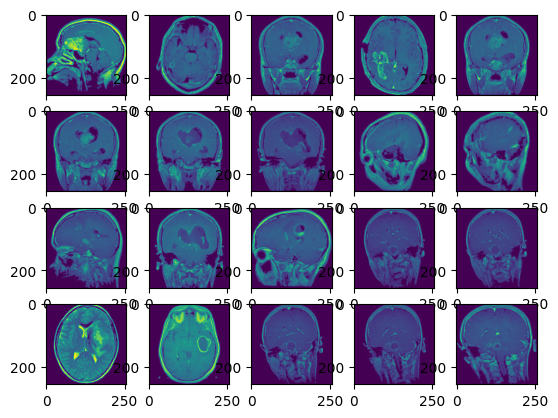

(2165, 65536)


In [3]:
# Read classes
classes = sorted(os.listdir("Data"))

# Initialize train and test data list
train_images, test_images = [], []
train_labels, test_labels = [], []

# Set training data ratio
train_ratio = 0.7

for i, class_name in enumerate(classes):

    # Read images in class folder
    class_data = os.listdir(os.path.join("Data", class_name))

    # Train data are the first images
    for img_name in class_data[:int(train_ratio*len(class_data))]:
        image = Image.open(os.path.join("Data", class_name, img_name))
        train_images.append(np.array(image))
        # Append labels
        train_labels.append(i)

    # Test data are the last images
    for img_name in class_data[int(train_ratio*len(class_data)):]:
        image = Image.open(os.path.join("Data", class_name, img_name))
        test_images.append(np.array(image))
        #Append labels
        test_labels.append(i)


train_images=np.array(train_images)
test_images=np.array(test_images)
train_labels = np.array(train_labels)
test_labels=np.array(test_labels)

train_images = train_images[:, :, :, 0]
test_images = test_images[:, :, :, 0]


print(train_images.shape,test_images.shape)
rows = 4
columns = 5
fig = plt.figure()
ax = []
for i in range(columns*rows):
    # Create subplot and append to ax.
    ax.append(fig.add_subplot(rows, columns, i+1))
    plt.imshow(train_images[i])

plt.show()

train_images = train_images.astype(np.float32)

train_images = train_images.reshape(train_images.shape[0], train_images.shape[1] * train_images.shape[2])
test_images = test_images.reshape(test_images.shape[0], test_images.shape[1] * test_images.shape[2])

print(train_images.shape)

PCA dimensionality reduction

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100) # Reduce to 100 components
X_train_pca = pca.fit_transform(train_images)
X_test_pca = pca.transform(test_images)

X_train_pca.shape

(2165, 100)

KNN k=46

(931, 2165)
[[215  15   4  37]
 [171  38  14  51]
 [ 47  18  50  17]
 [ 65   5   0 184]]
Accuracy = 0.523093447905478
Precision = 0.5759248064924056
Recall = 0.5088103481432434


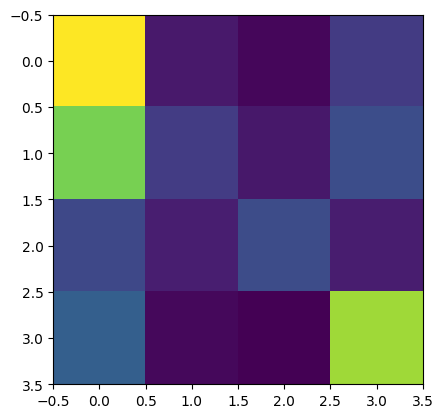

In [5]:
from scipy.spatial.distance import cdist

# Hyperparameter initialization
K=46 # sqrt(n), n=2165

# Calculate the distance matrix between all train objects and test objects
dist_matrix=cdist(X_test_pca, X_train_pca, metric='euclidean')
print(dist_matrix.shape)

# For each testing instance, order the distances from smallest to the largest 
# and find the train indices of the K closest ones
closest_indices = np.argsort(dist_matrix, axis=1)[:, :K]
dist=X_train_pca[closest_indices]
#print(dist)

# Get the labels of the neighbouring points
# Find the most frequent label
pred_labels = []
for indices in closest_indices:
    closest_labels = train_labels[indices]
    mode_label = stats.mode(closest_labels)  # Most frequent label
    pred_labels.append(mode_label.mode)

#print(pred_labels)
#print(len(pred_labels))
#print(test_labels)

#accuracy = np.mean(pred_labels == test_labels)
#print("Accuracy=", accuracy)

conf_matrix=confusion_matrix(test_labels,pred_labels)
print(conf_matrix)

plt.imshow(conf_matrix)
plt.show #(fa el dibui pero sense numeros)

print("Accuracy =", accuracy_score(test_labels,pred_labels))
print("Precision =", precision_score(test_labels,pred_labels,average='macro'))
print("Recall =", recall_score(test_labels,pred_labels,average='macro'))

k=3

(931, 2165)
[[211  30   9  21]
 [132  89   1  52]
 [ 32   8  85   7]
 [ 48   8   7 191]]
Accuracy = 0.6186895810955961
Precision = 0.6740519018665364
Recall = 0.6248308005256092


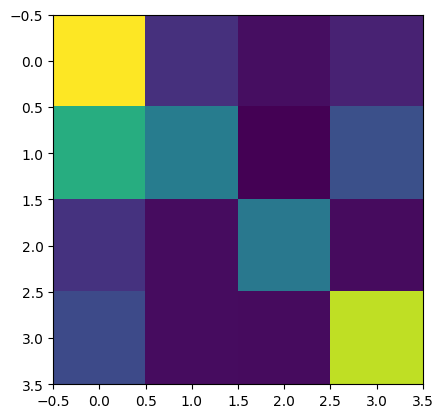

In [6]:
from scipy.spatial.distance import cdist

# Hyperparameter initialization
K=3 # This is the best value of K (3) I could find

# Calculate the distance matrix between all train objects and test objects
dist_matrix=cdist(X_test_pca, X_train_pca, metric='euclidean')
print(dist_matrix.shape)

# For each testing instance, order the distances from smallest to the largest 
# and find the train indices of the K closest ones
closest_indices = np.argsort(dist_matrix, axis=1)[:, :K]
dist=X_train_pca[closest_indices]
#print(dist)

# Get the labels of the neighbouring points
# Find the most frequent label
pred_labels = []
for indices in closest_indices:
    closest_labels = train_labels[indices]
    mode_label = stats.mode(closest_labels)  # Most frequent label
    pred_labels.append(mode_label.mode)

#print(pred_labels)
#print(len(pred_labels))
#print(test_labels)

#accuracy = np.mean(pred_labels == test_labels)
#print("Accuracy=", accuracy)

conf_matrix=confusion_matrix(test_labels,pred_labels)
print(conf_matrix)

plt.imshow(conf_matrix)
plt.show #(fa el dibui pero sense numeros)

print("Accuracy =", accuracy_score(test_labels,pred_labels))
print("Precision =", precision_score(test_labels,pred_labels,average='macro'))
print("Recall =", recall_score(test_labels,pred_labels,average='macro'))